In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('cars_data.csv')

In [34]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,NaN,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
2,NaN,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,NaN,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,NaN,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US


In [35]:
new_cols = ['test', 'Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']

df.columns = new_cols

In [36]:
df.head()

,test,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,NaN,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,NaN,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
2,NaN,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,NaN,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,NaN,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US


In [37]:
del df['test']
df = df.drop(index= 0)
df = df.drop(index= 1)

In [42]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
2,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
3,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
4,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US
5,AMC Rebel SST,16.0,8,304.0,150.0,3433,12.0,70,US
6,Ford Torino,17.0,8,302.0,140.0,3449,10.5,70,US


# What European Cars are the lightest Weight?

In [90]:
df.dtypes
df.Origin = df.Origin.astype('string')
df.Horsepower = df.Horsepower.astype('float')

In [61]:
df.dtypes

Car             object
MPG             object
Cylinders       object
Displacement    object
Horsepower      object
Weight          object
Acceleration    object
Model           object
Origin          string
dtype: object

In [102]:
df = df.drop(index=df[df['Origin'] != 'Europe'].index)

In [103]:
df.tail()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
368,Peugeot 505s Turbo Diesel,28.1,4,141.0,80.0,3230,20.4,81,Europe
369,Saab 900s,0,4,121.0,110.0,2800,15.4,81,Europe
370,Volvo Diesel,30.7,6,145.0,76.0,3160,19.6,81,Europe
385,Volkswagen Rabbit l,36.0,4,105.0,74.0,1980,15.3,82,Europe
404,Volkswagen Pickup,44.0,4,97.00,52.0,2130,24.6,82,Europe


In [89]:
df.Horsepower = df.Horsepower.astype('float')

In [104]:
df.dtypes

Car              object
MPG              object
Cylinders        object
Displacement     object
Horsepower      float64
Weight           object
Acceleration     object
Model            object
Origin           string
dtype: object

In [138]:
df = df.sort_values(by ='Weight', ascending = False)

In [153]:
df = df.head(10)

In [154]:
df['Car and Year'] = df['Car'] + ' ' + df['Model']

In [155]:
df = df.drop_duplicates(subset='Car and Year', keep="first")
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Car and Year
184,Volkswagen Rabbit,29.0,4,90.00,70.0,1937,14.0,75,Europe,Volkswagen Rabbit 75
206,Volkswagen Rabbit,29.0,4,90.00,70.0,1937,14.2,76,Europe,Volkswagen Rabbit 76
302,Volkswagen Rabbit Custom,31.9,4,89.00,71.0,1925,14.0,79,Europe,Volkswagen Rabbit Custom 79
126,Fiat 128,29.0,4,68.00,49.0,1867,19.5,73,Europe,Fiat 128 73
341,Volkswagen Rabbit,29.8,4,89.00,62.0,1845,15.3,80,Europe,Volkswagen Rabbit 80
27,Volkswagen 1131 Deluxe Sedan,26.0,4,97.00,46.0,1835,20.5,70,Europe,Volkswagen 1131 Deluxe Sedan 70
339,Renault Lecar Deluxe,40.9,4,85.00,0.0,1835,17.3,80,Europe,Renault Lecar Deluxe 80
64,Volkswagen Model 111,27.0,4,97.00,60.0,1834,19.0,71,Europe,Volkswagen Model 111 71
227,Renault 5 GTL,36.0,4,79.00,58.0,1825,18.6,77,Europe,Renault 5 GTL 77


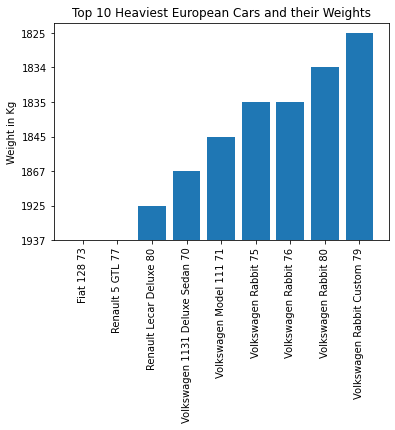

In [160]:
import matplotlib.pyplot as plt


cars = [car for car, df in df.groupby('Car and Year')]

plt.bar(cars, df["Weight"])
plt.xticks(cars, rotation = 'vertical')
plt.title('Top 10 Heaviest European Cars and their Weights')
plt.ylabel('Weight in Kg')

plt.show()
